# Introduction

## В этом блокноте я буду проводить разведывательный анализ данных (EDA) с той целью, чтобы выяснить, какие признаки оказывают наибольшее влияние на цену автомобиля, а также более внимательно исследуем их

## Датасет взят с https://www.kaggle.com/hellbuoy/car-price-prediction 

# import / load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



df = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', 200)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Preprocessing

In [2]:
# сбросим неинформативный признак
df.drop('car_ID', axis=1, inplace=True)

In [3]:
# это очень редко бывает, но в данном датасете нету отсутствующих значений
df.isnull().sum()*100/len(df)

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
# из столбца carname вычленим название компании и добавим новый столбец в фрейм
companyname = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3,'companyname',companyname)
df.drop('CarName', axis=1, inplace=True)

In [6]:
# видим, что названия авто указаны не верно - исправим это, а также приведём всё к одному регистру
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
df.companyname = df.companyname.str.lower()

def change_mark(wrong, right):
    df.companyname.replace(wrong, right, inplace=True)

change_mark('maxda','mazda')
change_mark('porcshce','porsche')
change_mark('toyouta','toyota')
change_mark('vokswagen','volkswagen')
change_mark('vw','volkswagen')   
df['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

посмотрим на распределение целевой переменной на гистограмме и на график q-q-plot

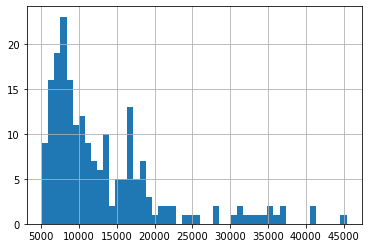

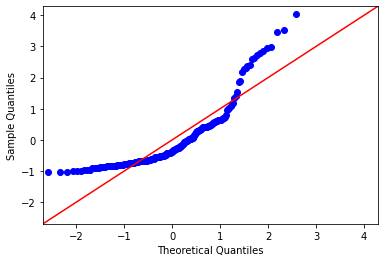

In [8]:
df.price.hist(bins=50)
sm.qqplot(df.price, fit=True, line='45')
plt.show()

 - видим, что распределение сильно отклоняется от теоритических квантилей и на гистограмме это также заметно
 - распределение имеет правостороннюю ассиметрию, среднее смещено вправо

In [9]:
print(df.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [10]:
# создадим списки с категориальными и числовыми переменными

qual = [i for i in df.columns if df[i].dtype.name == 'object' or len(df[i].unique())<10]
quan = [i for i in df.columns if df[i].dtype.name != 'object' and len(df[i].unique())>10 and i != 'price']
print(f'numeric feature - {len(quan)}\ncategory feature - {len(qual)}')

numeric feature - 13
category feature - 11


# Visualisation

## посмотрим самые популярные градации категориальных переменных

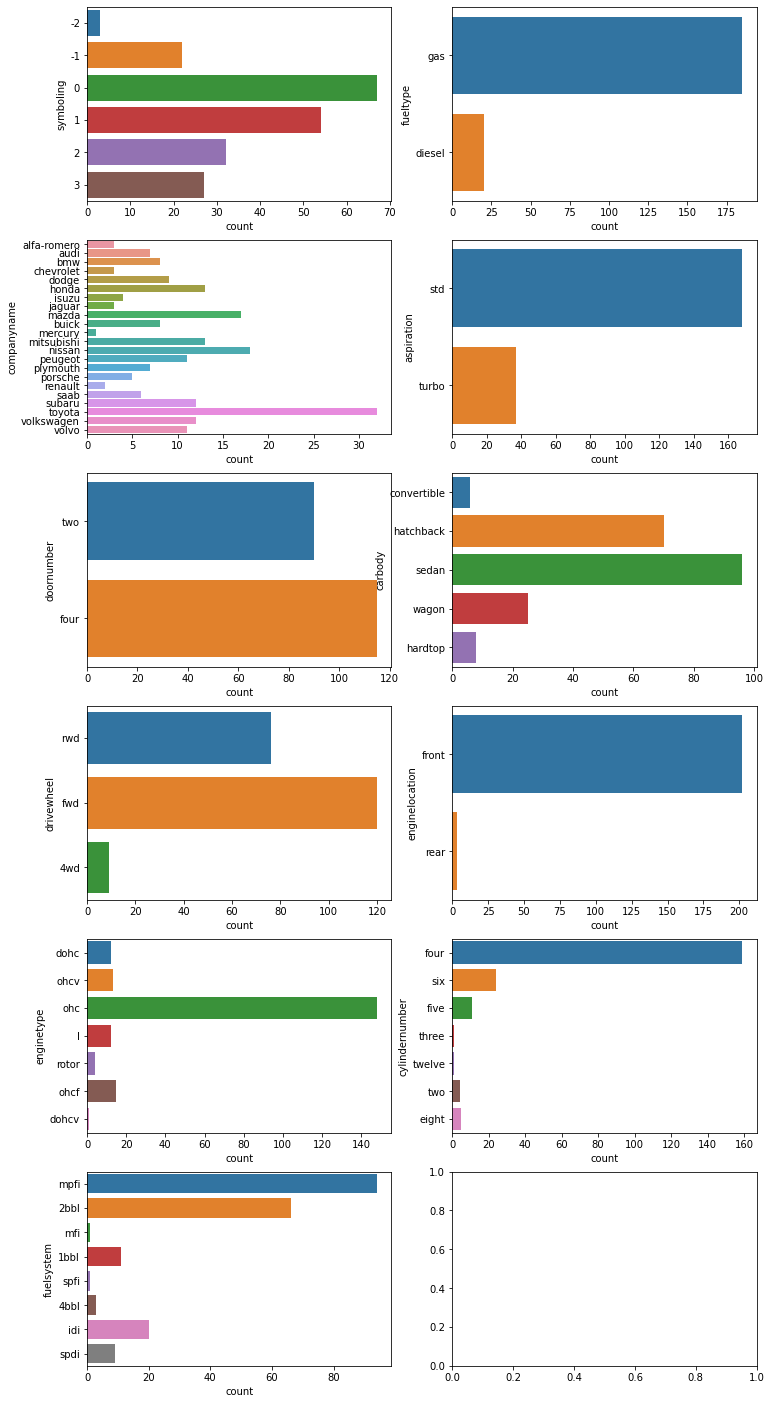

In [11]:
fig, axes = plt.subplots(figsize=(12,25), ncols=2, nrows=6, sharey=False)
flat_axes = axes.reshape(-1)

for i, col in enumerate(qual):
    sns.countplot(y=col, data=df, ax=flat_axes[i])

In [12]:
# промежуточные выводы

for col in qual:
    print(f'Самая используемая градация признака {col} : [{df[col].value_counts().index[0]}]')

Самая используемая градация признака symboling : [0]
Самая используемая градация признака fueltype : [gas]
Самая используемая градация признака companyname : [toyota]
Самая используемая градация признака aspiration : [std]
Самая используемая градация признака doornumber : [four]
Самая используемая градация признака carbody : [sedan]
Самая используемая градация признака drivewheel : [fwd]
Самая используемая градация признака enginelocation : [front]
Самая используемая градация признака enginetype : [ohc]
Самая используемая градация признака cylindernumber : [four]
Самая используемая градация признака fuelsystem : [mpfi]


## посмотрим на средние цены градаций категориальных признаков

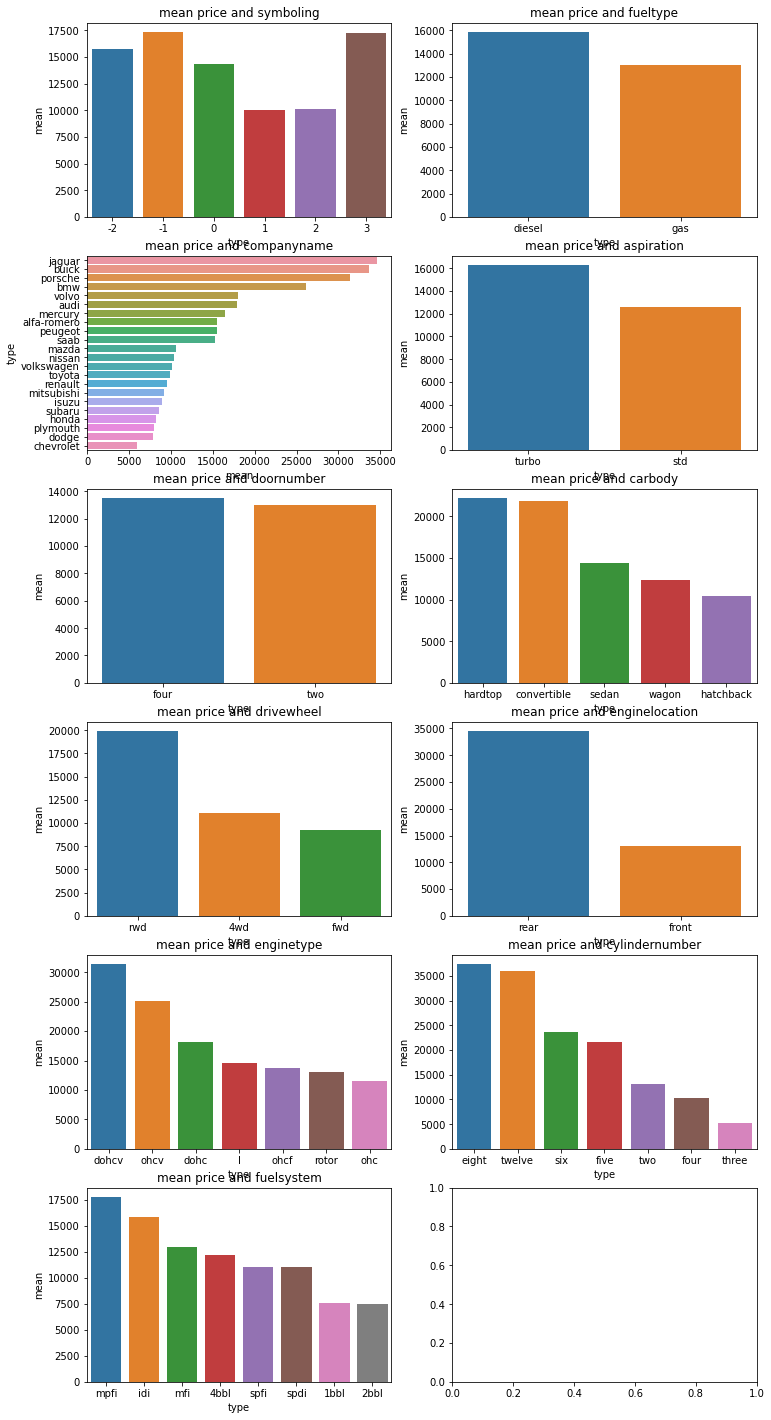

In [13]:
fig, axes = plt.subplots(figsize=(12,25), ncols=2, nrows=6, sharey=False)
flat_axes = axes.reshape(-1)

for i, col in enumerate(qual):
    
    if col == 'companyname':
        temp = pd.DataFrame({'type':df.groupby(col)['price'].mean().sort_values(ascending=False).index,
                             'mean':df.groupby(col)['price'].mean().sort_values(ascending = False)})
        sns.barplot(x='mean', y='type',data=temp, ax=flat_axes[i]).set_title(f'mean price and {col}')
    
    else:
        temp = pd.DataFrame({'type':df.groupby(col)['price'].mean().sort_values(ascending=False).index,
                             'mean':df.groupby(col)['price'].mean().sort_values(ascending=False)})
        sns.barplot(x='type', y='mean',data=temp, ax=flat_axes[i]).set_title(f'mean price and {col}')



In [14]:
# самая высокая средняя цена у следующих градаций признаков:

for col in qual:
    
    grad = df.groupby(col)['price'].mean().sort_values(ascending=False).index[0]
    price = df.groupby(col)['price'].mean().sort_values(ascending=False)[0]
    print(f'самая высокая средняя цена признака {col} - это его градация {grad} = {price}')


самая высокая средняя цена признака symboling - это его градация -1 = 14366.965179104478
самая высокая средняя цена признака fueltype - это его градация diesel = 15838.15
самая высокая средняя цена признака companyname - это его градация jaguar = 34600.0
самая высокая средняя цена признака aspiration - это его градация turbo = 16298.166675675677
самая высокая средняя цена признака doornumber - это его градация four = 13501.152173913044
самая высокая средняя цена признака carbody - это его градация hardtop = 22208.5
самая высокая средняя цена признака drivewheel - это его градация rwd = 19910.809210526317
самая высокая средняя цена признака enginelocation - это его градация rear = 34528.0
самая высокая средняя цена признака enginetype - это его градация dohcv = 31400.5
самая высокая средняя цена признака cylindernumber - это его градация eight = 37400.1
самая высокая средняя цена признака fuelsystem - это его градация mpfi = 17754.60284042553


## посмотрим на плотность  распределения цены в зависимости от категориальных признаков

для этого буду использовать скрипичный график, так как по нему можно анализировать как и характер распределения так и выбросы

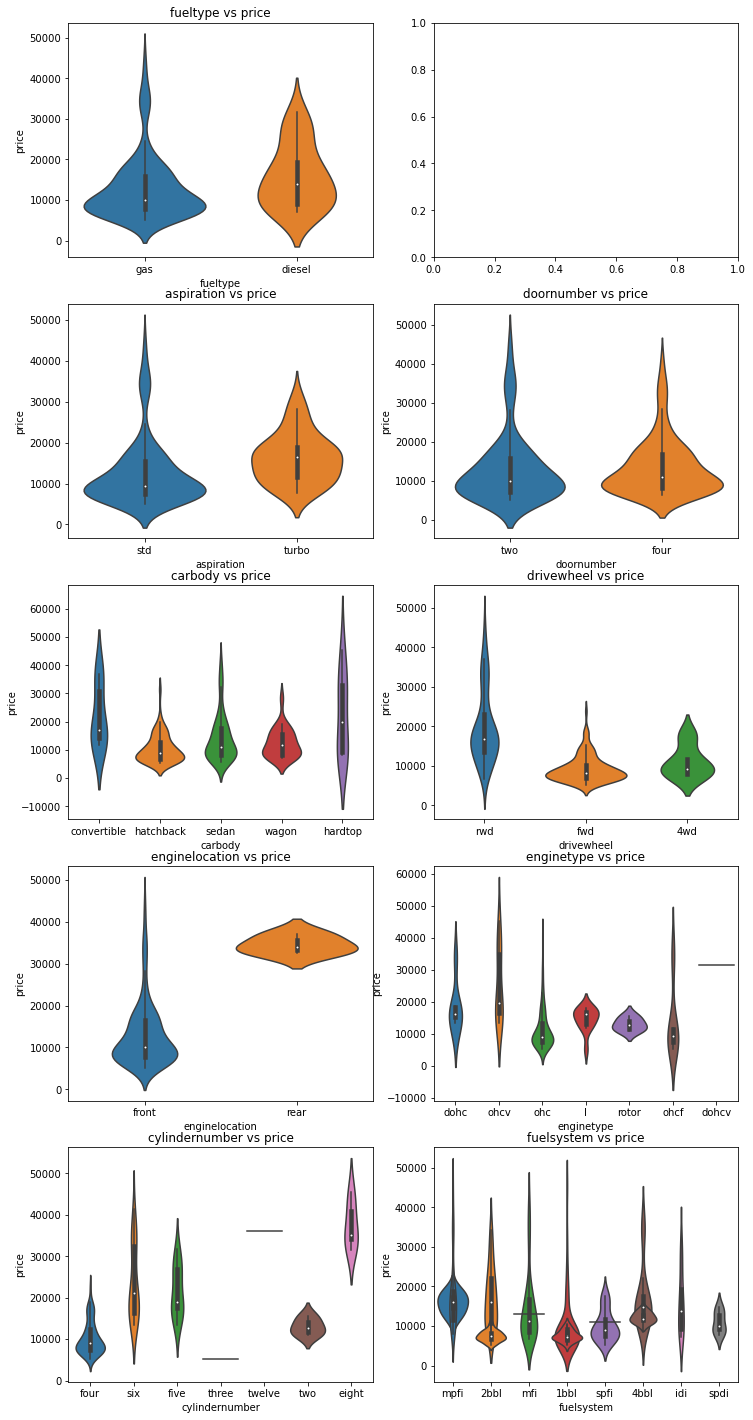

In [15]:
fig, axes = plt.subplots(figsize=(12,25), ncols=2, nrows=5, sharey=False)
flat_axes = axes.reshape(-1)

for i, col in enumerate(qual):
    
    # отображу данный признак отдельно
    if col == 'companyname':
        continue
    else:
        sns.violinplot(x=col,y='price',data=df, ax=flat_axes[i-1]).set_title(f'{col} vs price')

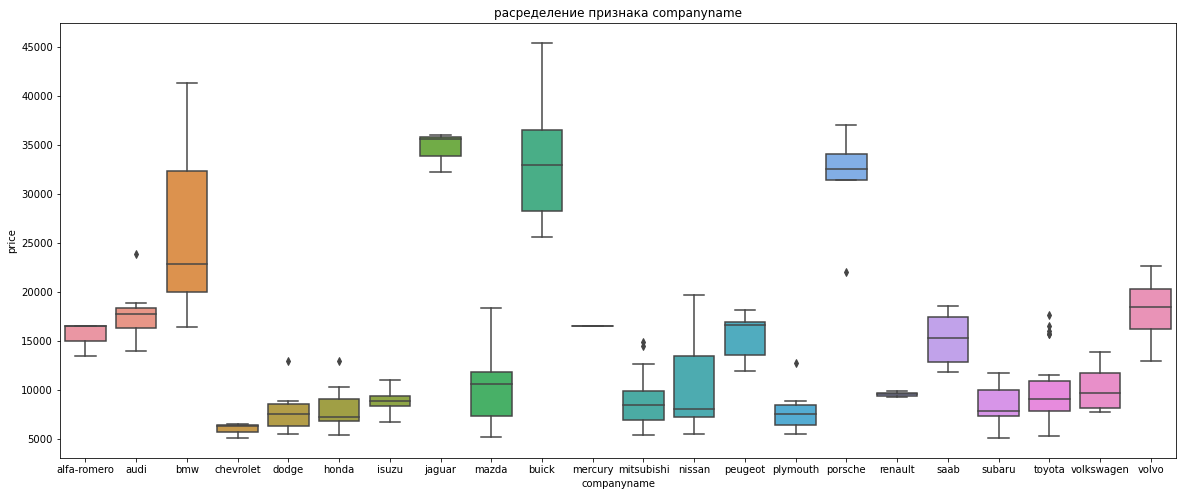

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(x='companyname', y='price', data=df).set_title('расределение признака companyname')
plt.show()

как видим, практически у всех признаков и их градаций есть выбросы - это не есть хорошо, так как это влияет на описательные статистики

## Визуализация количественных признаков

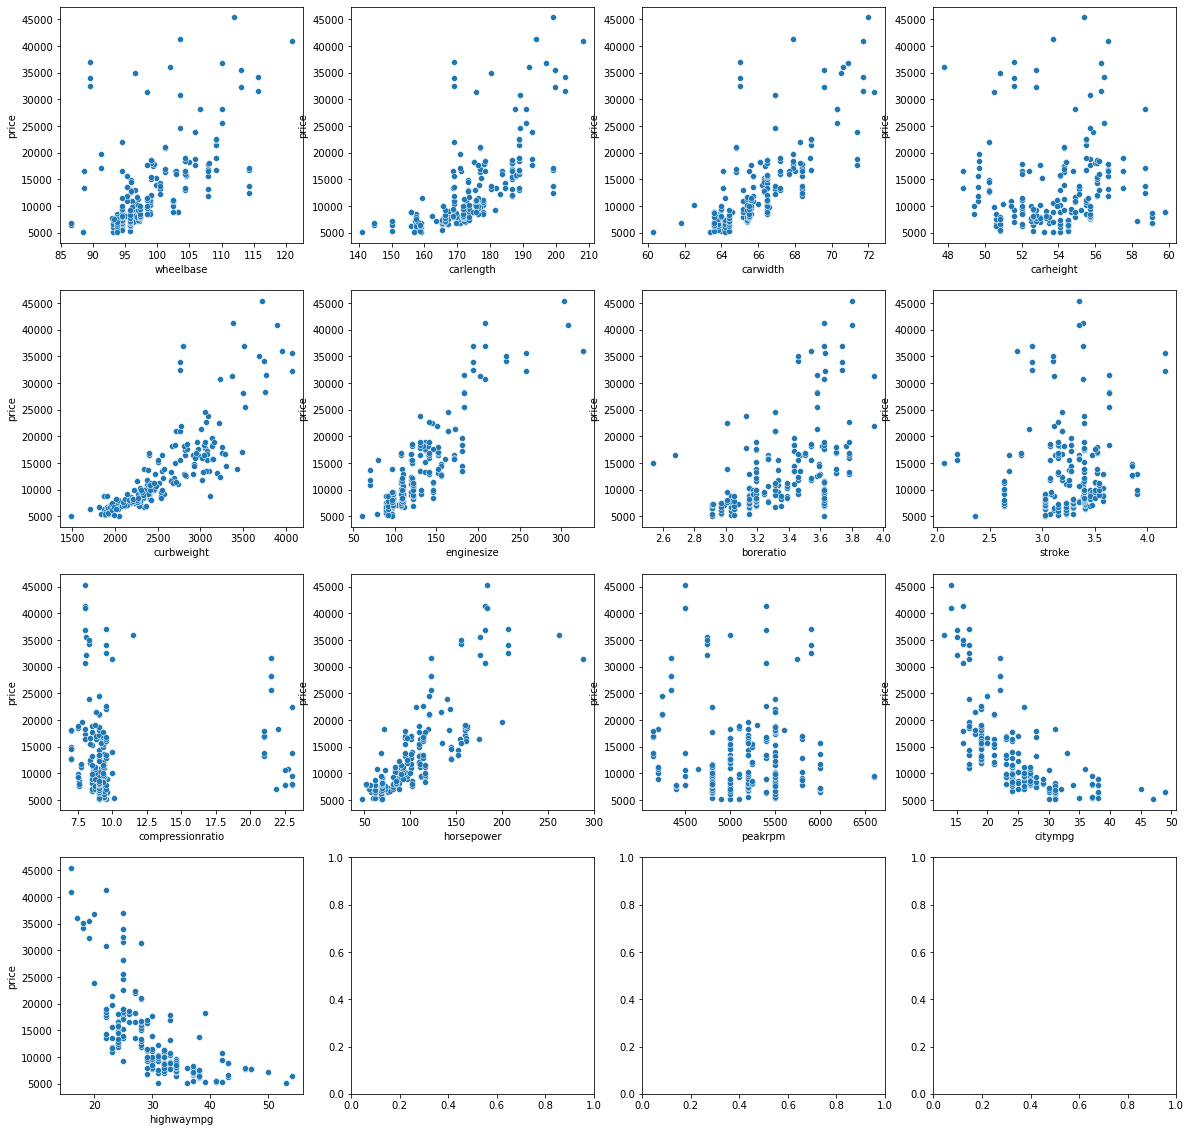

In [17]:

fig, axes = plt.subplots(figsize=(20,20), ncols=4, nrows=4, sharey=False)
flat_axes = axes.reshape(-1)

for i, col in enumerate(quan):

    sns.scatterplot(x=col, y='price', data=df, ax=flat_axes[i])
    


как видим, у некоторых признаков прослеживается отчётливая корреляция:
 - highwaympg
 - citympg
 - curbweight
 - carwidth
 - enginesize

данные количественные признаки, вероятнее всего, влияют на ценообразование

# Coding 

кодировать будем категориальные признаки на основании ранжирования по средней цене градации каждого признака, т.е. чем выше ранг, тем выше средняя цена


In [18]:
df_copy = df.copy() 


def encode(df,feature):
    ordering = pd.DataFrame()
    ordering['val'] = df_copy[feature].unique()
    ordering.index=ordering.val
    ordering['meanprice'] = df_copy.groupby(feature)['price'].mean()
    ordering = ordering.sort_values('meanprice')
    ordering['ordering'] = range(1,ordering.shape[0] + 1)
    ordering=ordering['ordering'].to_dict()
    
    for m,n in ordering.items():
        df.loc[df_copy[feature] == m, feature+'_encode'] = n
        
    df_copy.drop(feature, axis=1, inplace=True)
    
for i in qual:
    encode(df_copy,i)

In [19]:
df_copy.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_encode,fueltype_encode,companyname_encode,aspiration_encode,doornumber_encode,carbody_encode,drivewheel_encode,enginelocation_encode,enginetype_encode,cylindernumber_encode,fuelsystem_encode
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,5.0,1.0,15.0,1.0,1.0,4.0,3.0,1.0,5.0,2.0,8.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,5.0,1.0,15.0,1.0,1.0,4.0,3.0,1.0,5.0,2.0,8.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1.0,1.0,15.0,1.0,1.0,1.0,3.0,1.0,6.0,5.0,8.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2.0,1.0,17.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,8.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2.0,1.0,17.0,1.0,2.0,3.0,2.0,1.0,1.0,4.0,8.0


# Correlations

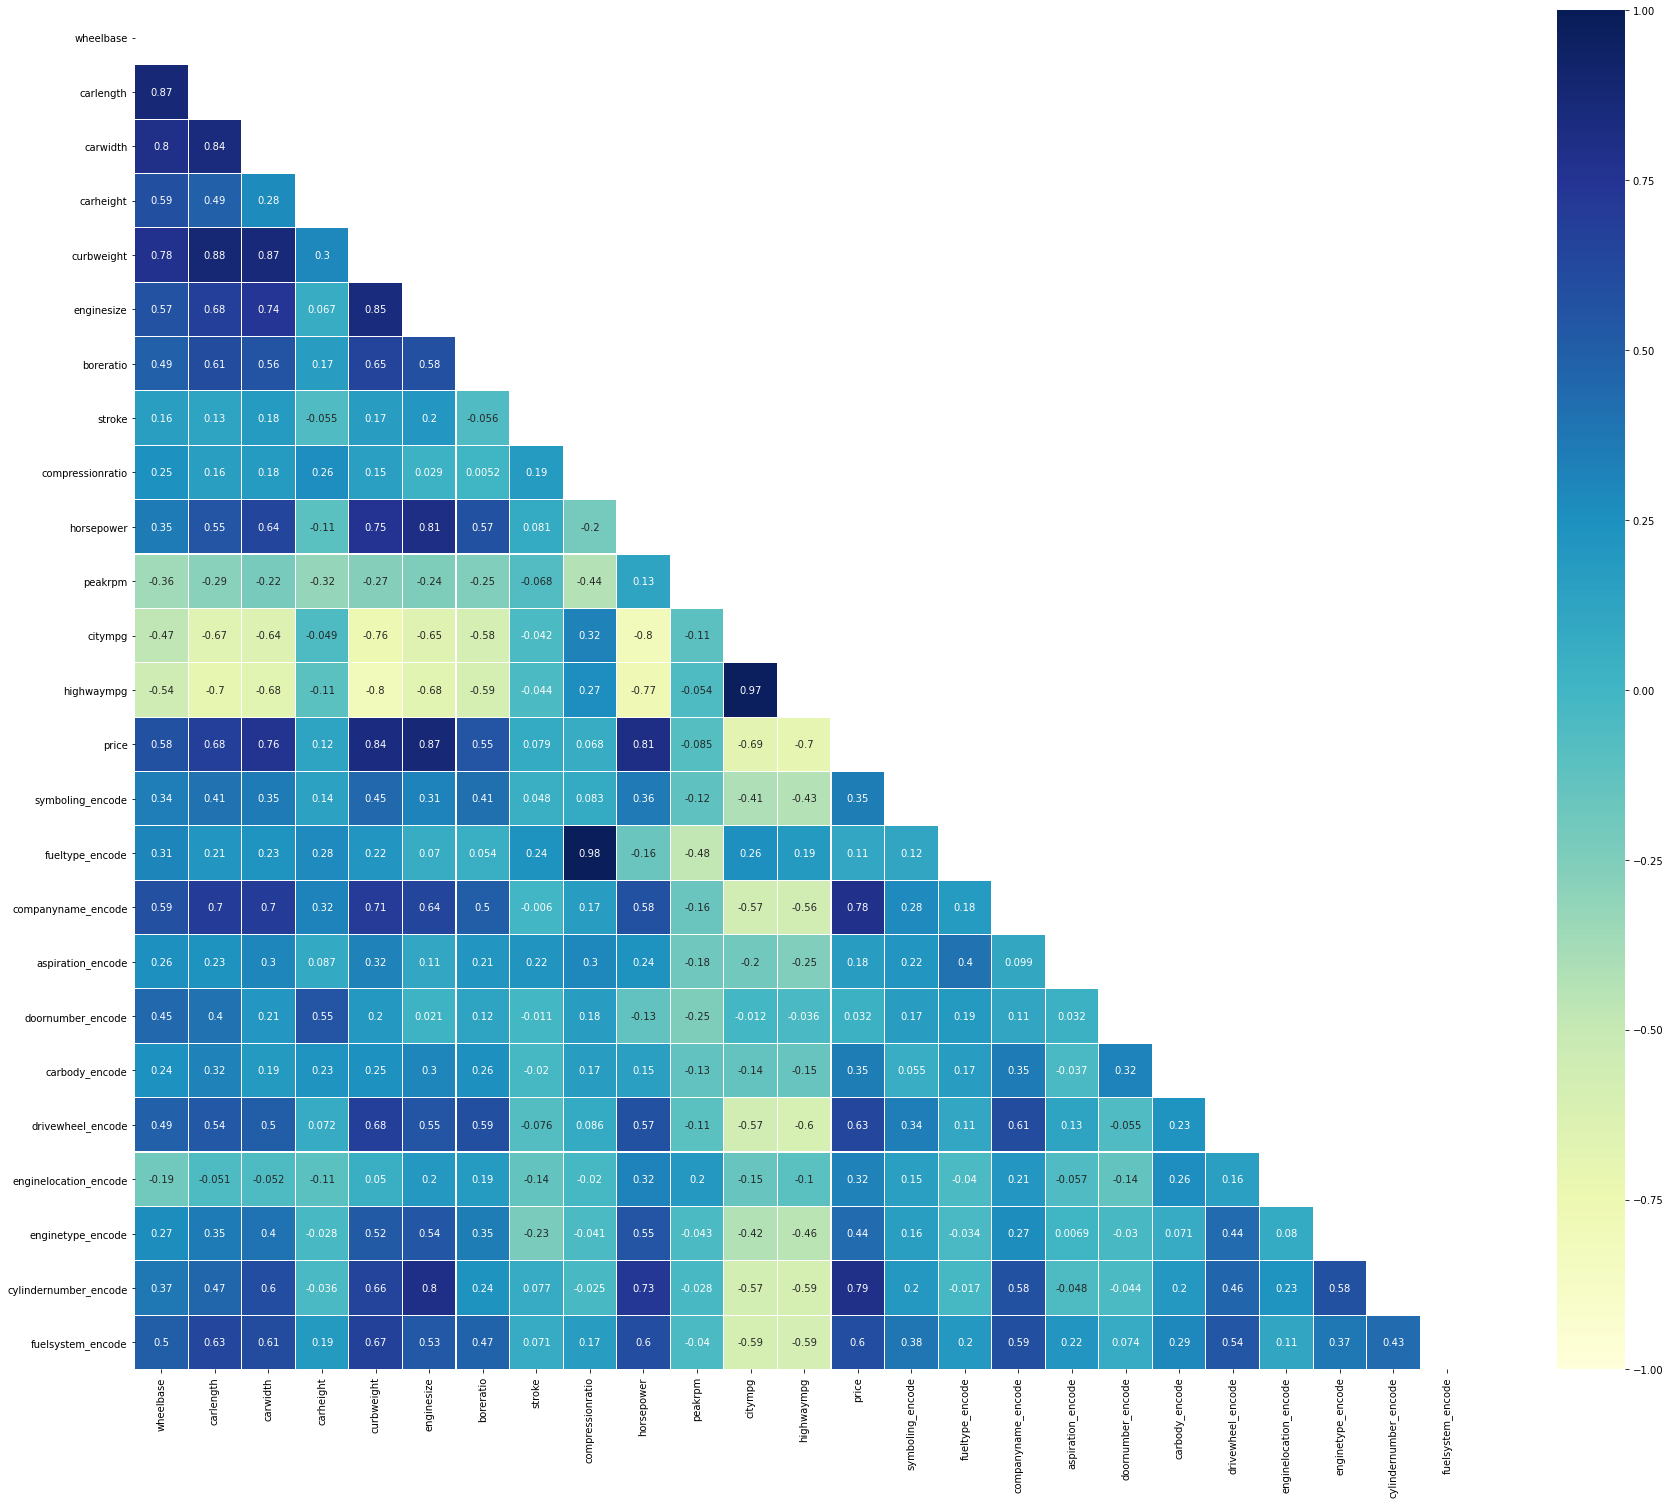

In [20]:
corr = df_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30,25))
sns.heatmap(df_copy.corr(),mask=mask, linewidths=0.1, annot=True,vmin=-1, vmax=1, center=0,cmap="YlGnBu")
plt.show()

In [21]:
# наиболее сильные корреляции есть со следующими признаками:

df_copy.corr().loc[df_copy.corr()['price']>0.7]['price'].to_frame()

,price
carwidth,0.759325
curbweight,0.835305
enginesize,0.874145
horsepower,0.808139
price,1.000000
companyname_encode,0.782350
cylindernumber_encode,0.789703


# Summary

## В результате EDA выяснили:
 - самые популярные градации категориальных переменных
 - самые высокие средние цены среди градаций каждого категориального признака
 - посмотрели на распределение плотности и наличие выбросов у категориальных признаков
 - определели количественные и качественные признаки, которые наиболее сильно коррелируют с целевой переменной и, следовательно, могут иметь причинно-следственную связьс ней
 - также при анализе таблицы кореляций обращаем внимание, что есть признаки, которые сильно коррелируют между собой, то есть могут быть выражены друг через друга и в последствии, мы можем их убрать.
